# MASTER CDE: hands-on practical sessions

# Notebooks

This semester, we will use Jupyter notebooks and Google colab as the primary way to practice machine learning. Notebooks are a great way to mix executable code with rich contents (HTML, images, equations written in LaTeX). Colab allows to run notebooks on the cloud for free without any prior installation, while leveraging the power of [GPUs](https://en.wikipedia.org/wiki/Graphics_processing_unit).

The document that you are reading is not a static web page, but an interactive environment called a notebook, that lets you write and execute code. Notebooks consist of so-called code cells, blocks of one or more Python instructions. For example, here is a code cell that stores the result of a computation (the number of seconds in a day) in a variable and prints its value:

In [167]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Click on the "play" button to execute the cell. You should be able to see the result. Alternatively, you can also execute the cell by pressing Ctrl + Enter if you are on Windows / Linux or Command + Enter if you are on a Mac.

Variables that you defined in one cell can later be used in other cells:

In [168]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Note that the order of execution is important. For instance, if we do not run the cell storing *seconds_in_a_day* beforehand, the above cell will raise an error, as it depends on this variable. To make sure that you run all the cells in the correct order, you can also click on "Runtime" in the top-level menu, then "Run all".

**Exercise.** Add a cell below this cell: click on this cell then click on "+ Code". In the new cell, compute the number of seconds in a year by reusing the variable *seconds_in_a_day*. Run the new cell.

In [169]:
seconds_in_a_year = 52 * seconds_in_a_week
seconds_in_a_year

31449600

# Basic Python

## Exercises

**Exercise 1.** Using a conditional, write the [relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function defined as follows

$\text{relu}(x) = \left\{
   \begin{array}{rl}
     x, & \text{if }  x \ge 0 \\
     0, & \text{otherwise }.
   \end{array}\right.$

In [170]:
def relu(x):
  # Write your function here
  if x >= 0: 
    return x
  else: 
    return 0

relu(-3)

0

**Exercise 2.** Using a for loop, write a function that computes the [Euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm) of a vector, represented as a list.

In [171]:
import numpy as np
from math import sqrt
def euclidean_norm(vector):
  # Write your function here
  squared_sum = 0
  for i in  vector:
    j = i*i
    squared_sum += j
  euclidean_dist = sqrt(squared_sum)
  return euclidean_dist


my_vector = [0.5, -1.2, 3.3, 4.5]
# The result should be roughly 5.729746940310715
euclidean_norm(my_vector)

5.729746940310715

**Exercise 3.** Using a for loop and a conditional, write a function that returns the maximum value in a vector.

In [172]:
def vector_maximum(vector):
  # Write your function here
  maxi = vector[0]
  for i in vector:
    if maxi < i:
      maxi = i
  return maxi
  #
  # return  np.max(vector)

#Create a random NumPy Vector
second_vector = np.array([0.5, -1.2, 3.3, 4.5])
vector_maximum(second_vector)

4.5

# NumPy

NumPy is a popular library for storing arrays of numbers and performing computations on them. Not only this enables to write often more succint code, this also makes the code faster, since most NumPy routines are implemented in C for speed.

To use NumPy in your program, you need to import it as follows

In [173]:
import numpy as np

## Array creation



NumPy arrays can be created from Python lists

In [174]:
my_array = np.array([1, 2, 3])
my_array

array([1, 2, 3])

NumPy supports array of arbitrary dimension. For example, we can create two-dimensional arrays (e.g. to store a matrix) as follows

In [175]:
my_2d_array = np.array([[1, 2, 3], [4, 5, 6]])
my_2d_array

array([[1, 2, 3],
       [4, 5, 6]])

We can access individual elements of a 2d-array using two indices

In [176]:
my_2d_array[1, 2]

6

We can also access rows

In [177]:
my_2d_array[1]

array([4, 5, 6])

and columns

In [178]:
my_2d_array[:, 2]

array([3, 6])

Arrays have a `shape` attribute

In [179]:
print(my_array.shape)
print(my_2d_array.shape)

(3,)
(2, 3)


Contrary to Python lists, NumPy arrays must have a type and all elements of the array must have the same type.

In [180]:
my_array.dtype

dtype('int32')

The main types are `int32` (32-bit integers), `int64` (64-bit integers), `float32` (32-bit real values) and `float64` (64-bit real values).

The `dtype` can be specified when creating the array

In [181]:
my_array = np.array([1, 2, 3], dtype=np.float64)
my_array.dtype

dtype('float64')

We can create arrays of all zeros using

In [182]:
zero_array = np.zeros((2, 3))
zero_array

array([[0., 0., 0.],
       [0., 0., 0.]])

and similarly for all ones using `ones` instead of `zeros`.

We can create a range of values using

In [183]:
np.arange(5)

array([0, 1, 2, 3, 4])

or specifying the starting point

In [184]:
np.arange(3, 5)

array([3, 4])

Another useful routine is `linspace` for creating linearly spaced values in an interval. For instance, to create 10 values in `[0, 1]`, we can use

In [185]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

Another important operation is `reshape`, for changing the shape of an array

In [186]:
my_array = np.array([1, 2, 3, 4, 5, 6])
my_array.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

Play with these operations and make sure you understand them well.

## Basic operations

In NumPy, we express computations directly over arrays. This makes the code much more succint.

Arithmetic operations can be performed directly over arrays. For instance, assuming two arrays have a compatible shape, we can add them as follows

In [187]:
array_a = np.array([1, 2, 3])
array_b = np.array([4, 5, 6])
array_a + array_b

array([5, 7, 9])

Compare this with the equivalent computation using a for loop

In [188]:
array_out = np.zeros_like(array_a)
for i in range(len(array_a)):
  array_out[i] = array_a[i] + array_b[i]
array_out

array([5, 7, 9])

Not only this code is more verbose, it will also run much more slowly.

In NumPy, functions that operates on arrays in an element-wise fashion are called [universal functions](https://numpy.org/doc/stable/reference/ufuncs.html). For instance, this is the case of `np.sin`

In [189]:
np.sin(array_a)

array([0.84147098, 0.90929743, 0.14112001])

Vector inner product can be performed using `np.dot`

In [190]:
np.dot(array_a, array_b)

32

When the two arguments to `np.dot` are both 2d arrays, `np.dot` becomes matrix multiplication

In [191]:
array_A = np.random.rand(5, 3)
array_B = np.random.randn(3, 4)
np.dot(array_A, array_B)

array([[ 1.25597067,  1.75261697,  2.09839246, -2.10479829],
       [ 0.72508827,  1.09830629,  0.93541546, -1.33946584],
       [ 0.17665301,  1.09810254,  1.68052098, -0.70642389],
       [ 1.09304031,  0.48270466,  0.80650101, -1.1951982 ],
       [ 1.4031327 ,  0.55564612,  1.29847377, -1.43058194]])

Matrix transpose can be done using `.transpose()` or `.T` for short

In [192]:
array_A.T

array([[0.9633159 , 0.49026671, 0.8051335 , 0.23584543, 0.37042824],
       [0.83229469, 0.66286985, 0.04550277, 0.50413804, 0.48539462],
       [0.74837944, 0.34108852, 0.24747054, 0.64827069, 0.91439527]])

## Slicing and masking

Like Python lists, NumPy arrays support slicing

In [193]:
np.arange(10)[5:]

array([5, 6, 7, 8, 9])

We can also select only certain elements from the array

In [194]:
x = np.arange(10)
mask = x >= 5
x[mask]

array([5, 6, 7, 8, 9])

## Exercises

**Exercise 1.** Create a 3d array of shape (2, 2, 2), containing 8 values. Access individual elements and slices.

In [195]:
array_3D = np.random.randn(2, 2, 2)
print(array_3D[0, :, :]) # Double check how to extract the value of 3D Array

[[ 0.25770943  0.58531014]
 [ 1.15428914 -1.73916271]]


In [196]:
array_3D.shape

(2, 2, 2)

In [197]:
a = np.array([1, -3, 2.5])
type(a)

numpy.ndarray

**Exercise 2.** Rewrite the relu function (see Python section) using [np.maximum](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html). Check that it works on both a single value and on an array of values.

In [198]:
def relu_numpy(x):
      return np.maximum(x, 0)

#relu_numpy(4)
relu_numpy(np.array([1, -3, 2.5]))

array([1. , 0. , 2.5])

**Exercise 3.** Rewrite the Euclidean norm of a vector (1d array) using NumPy (without for loop)

In [199]:
def euclidean_norm_numpy(x):
  squares = [i* i for i in x]
  squares_sum = np.sum(squares)
  root = np.sqrt(squares_sum)
  return root

  #return np.sqrt((x*x).sum())
my_vector = np.array([0.5, -1.2, 3.3, 4.5])
euclidean_norm_numpy(my_vector)

5.729746940310715

**Exercise 4.** Write a function that computes the Euclidean norms of a matrix (2d array) in a row-wise fashion. Hint: use the `axis` argument of [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html).

In [200]:
def euclidean_norm_2d(X):
  squares = [i* i for i in X]
  squares_sum = np.sum(squares, axis = 1)
  root = np.sqrt(squares_sum)
  return root

my_matrix = np.array([[0.5, -1.2, 4.5],
                      [-3.2, 1.9, 2.7]])
# Should return an array of size 2.
euclidean_norm_2d(my_matrix)

array([4.68401537, 4.59782557])

**Exercise 5.** Compute the mean value of the features in the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Hint: use the `axis` argument on [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html).

In [201]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
print(np.mean(X, axis= 0)) # features
#print(np.mean(y, axis= 0)) # target

# Result should be an array of size 4.

[5.84333333 3.05733333 3.758      1.19933333]


## Going further

* NumPy [reference](https://numpy.org/doc/stable/reference/)
* SciPy [lectures](https://scipy-lectures.org/)
*   One-hour [tutorial](https://www.youtube.com/watch?v=QUT1VHiLmmI) on Youtube 



# Matplotlib

## Basic plots

Matplotlib is a plotting library for Python.

We start with a rudimentary plotting example.

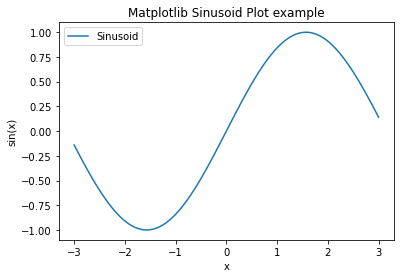

In [202]:
from matplotlib import pyplot as plt

x_values = np.linspace(-3, 3, 100)

plt.figure()
plt.plot(x_values, np.sin(x_values), label="Sinusoid")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Matplotlib Sinusoid Plot example")
plt.legend(loc="upper left")
plt.show()

We continue with a rudimentary scatter plot example. This example displays samples from the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) using the first two features. Colors indicate class membership (there are 3 classes).

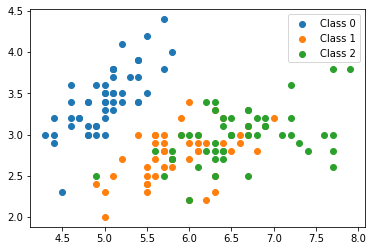

In [203]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

X_class0 = X[y == 0]
X_class1 = X[y == 1]
X_class2 = X[y == 2]

plt.figure()
plt.scatter(X_class0[:, 0], X_class0[:, 1], label="Class 0", color="C0")
plt.scatter(X_class1[:, 0], X_class1[:, 1], label="Class 1", color="C1")
plt.scatter(X_class2[:, 0], X_class2[:, 1], label="Class 2", color="C2")
plt.legend()
plt.show()

We see that samples belonging to class 0 can be linearly separated from the rest using only the first two features.

## Exercises



**Exercise 1.** Plot the relu and the [softplus](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Softplus) functions on the same graph.

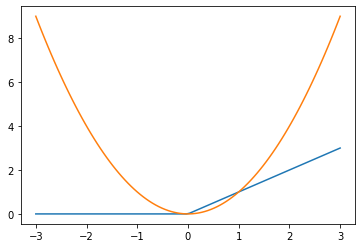

In [204]:
x_values = np.linspace(-3, 3, 100)
x = relu_numpy(x_values)
x1 = relu_numpy(x_values)
x2 = x_values*x_values

plt.plot(x_values, x1, label = 'relu')
plt.plot(x_values, x2, label = "x**2")
plt.show()

What is the main difference between the two functions?

**Exercise 2.** Repeat the same scatter plot but using the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) instead.

In [205]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

plt.figure()
plt.scatter(X)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
y

array([0, 1, 2, ..., 8, 9, 8])

Are pixel values good features for classifying samples?

## Going further

*  Official [tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
* [Tutorial](https://www.youtube.com/watch?v=qErBw-R2Ybk) on Youtube

# Linear Algebra

**exercice 1.**
Here is a collection of samples from a 2D Gaussian distributions

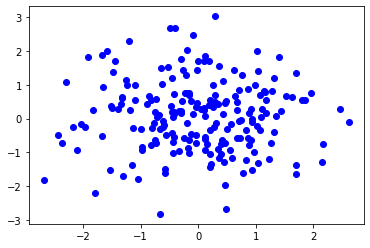

In [ ]:
import numpy as np
import matplotlib.pylab as plt
X = np.random.randn(200,2)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], label="Data samples", color="b")
plt.show()

find a way to draw, upon the same diagram, the two eigenvectors (plotted as blue arrows) of this distribution, from the empirical mean of the data. You can scale them with respect to their eigenvalues.

In [ ]:
from numpy import linalg as LA

mean = np.mean(X, axis = 0)
w, v  =LA.eig(X.T.dot(X))

plt.figure(figsize = (10, 10))
plt.scatter(mean[0], mean[1], label = "Mean of Data Samples", color = 'r')
plt.scatter(X[:, 0], X[:, 1], label = "Data Samples", color = "b")
plt.plot([mean[0], mean[0]+v[0,0]], [mean[1],mean[1]= v[1,0]], label = "First Eigen Direction", color = "g")
plt.plot([mean[0], mean[0]+v[0,0]], [mean[1],mean[1]= v[1,0]], label = "First Eigen Direction", color = "g")
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-126-07c1b4ee4c0d>, line 9)

**exercice 2.**
Find a way to solve the following system in numpy. Express the system of equations with matrix / vectors, and use the inverse to find a solution. (_Hint_: you can also use scipy)

$$\begin{alignat*}{4}
   2x & {}+{} &  y & {}+{} & 3z & {}={} & 10 \\
    x & {}+{} &  y & {}+{} &  z & {}={} &  6 \\
    x & {}+{} & 3y & {}+{} & 2z & {}={} & 13
\end{alignat*} $$

In [ ]:
from numpy import linalg as LA

A =np.array([[2, 1, 3], [1, 1, 1], [1, 3, 2]]) 
b = np.array([10, 6, 13])

print(LA.solve(A, b))
print(LA.inv(A).dot(b))

[2. 3. 1.]
[2. 3. 1.]


# Playing with an hyperspectral image

We are now going to load and visualize an hyperspectral image. Urban is one of the most widely used hyperspectral data generally in the hyperspectral unmixing study. There are 307 x 307 pixels, each of which corresponds to a 2 x 2 $m^2$ area. In this image, there are 210 wavelengths ranging from 400 nm  to 2500 nm, resulting in a spectral resolution of 10 nm. After the channels 1--4, 76, 87, 101--111, 136--153 and 198--210 are removed (due to dense water vapor and atmospheric effects), giving a final image of 162  channels.


First we need to load the dataset. It is available in the Matlab format under the name ```Urban_R162.mat```. First you can try to load this file and examine its (dictionnary) structure. If you are under Google collab, you need to find a way to load it from a google drive.

In [ ]:
import scipy.io as scio
import pylab as pl
import numpy as np

Y = np.array(image)

In [ ]:
import scipy.io
mat = scipy.io.loadmat(f'C:\\Users\\rufai\\OneDrive\\Desktop\\UBS\\General Information for Students\\Maths and Computer Science Basics\\Urban_R162.mat')
mat["Y"][0]

array([109, 116, 119, ...,  16,  12,   9], dtype=uint16)

In [ ]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'SlectBands', 'nRow', 'nCol', 'nBand', 'Y', 'maxValue'])

In [206]:
print(mat["nRow"])
print

array([[307]], dtype=uint16)

Then, using ```pl.imshow```, try to plot some bands and observe the spatial structure of the dataset.

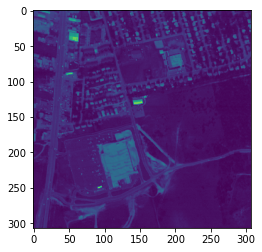

In [211]:
plt.imshow(mat["Y"][1].reshape(307, 307))

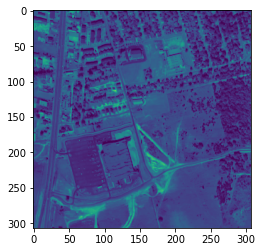

In [212]:
plt.imshow(mat["Y"][100].reshape(307, 307))

by associating band 10 to Red, 100 to Green and 150 to Blue, try to display the image as a false color image 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


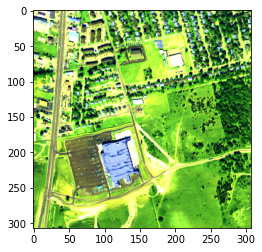

In [210]:
RGB = [mat["Y"][150].reshape(307, 307), mat["Y"][100].reshape(307, 307), mat["Y"][10].reshape(307, 307)]
RGB = np.stack(RGB, axis = -1)
plt.imshow(RGB)

Final exercice: on a graphic, that shows wavelengths as X-axis, and the corresponding magnitude on the Y-axis, display 10 randomly chosen spectra (i.e. over 10 different pixels) on the same figure. 

In [216]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'SlectBands', 'nRow', 'nCol', 'nBand', 'Y', 'maxValue'])

In [218]:
# Plotting 10 random spectral signatures
Y = mat["Y"]
np.random.seed(1976)
Xc = np.random.randint(0, 307, 10)
Yc = np.random.randint(0, 307, 10)

plt.figure()

for i in range(10):
    plt.plot(Y[Xc[i], Yc[i], :])

plt.title("10 Spectral bands", fontsize= 16)
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 432x288 with 0 Axes>